# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.



### Problem Statement

We'll work on the Starbucks's Dataset, which mimics how consumers make purchasing decisions and how promotional offers influence those decisions.

Buy-one-get-one (BOGO), discount, and informational offers are the three sorts of offers that can be sent.

We'll split client data based on several criteria and examine their behavior in response to various offers.

#### In the Data Analysis section of this project, we'll examine the data and try to answer the following questions:
- what is the percentages of all age ranges?
- How is the subscription date increasing over the years?
- what is the percentages of each gender?
- correlation heat map for profile dataset
- how does the age ranges effect the income of the starbucks customers?
- age distribution and gender in starbucks customers.
- what is the average age of starbucks customers?
- what is the average income of starbucks customers?
- what is the number of users for each year?
- what is the most frequent offer type?
- what is the most popular Offer Event to each Gender?

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

## Data Understanding & Exploration


In [83]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### 1. portfolio

In [84]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [85]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [86]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

In [87]:
from sklearn.preprocessing import MultiLabelBinarizer
MultiLabel = MultiLabelBinarizer()

reset = pd.DataFrame(MultiLabel.fit_transform(portfolio['channels']),
                     columns=MultiLabel.classes_,
                     index=portfolio['channels'].index)

portfolio = pd.concat([portfolio, reset], axis=1)
portfolio

,channels,difficulty,duration,id,offer_type,reward,email,mobile,social,web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [88]:
portfolio = portfolio.drop('channels', axis=1)

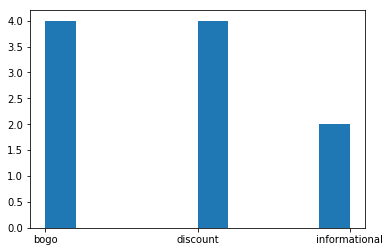

In [89]:
import matplotlib.pyplot as plt
plt.hist(portfolio.offer_type);

In [90]:
portfolio.isna().sum()

difficulty    0
duration      0
id            0
offer_type    0
reward        0
email         0
mobile        0
social        0
web           0
dtype: int64



### 2. profile

In [91]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [92]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [93]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

**As we can see we have some NaN values in income column, so I will fill them with the mean.**



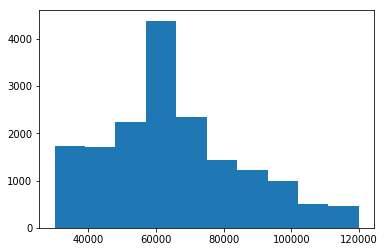

In [94]:
profile['income'] = profile['income'].fillna((profile['income'].mean()))
plt.hist(profile.income);

In [95]:
# change the date's format
dates = pd.to_datetime(profile['became_member_on'], format='%Y%m%d') 
profile['became_member_on'] = dates
profile['became_member_on'].head()

0   2017-02-12
1   2017-07-15
2   2018-07-12
3   2017-05-09
4   2017-08-04
Name: became_member_on, dtype: datetime64[ns]

In [96]:
profile['start_year'] = profile.became_member_on.dt.year
profile['start_year'].head()

0    2017
1    2017
2    2018
3    2017
4    2017
Name: start_year, dtype: int64

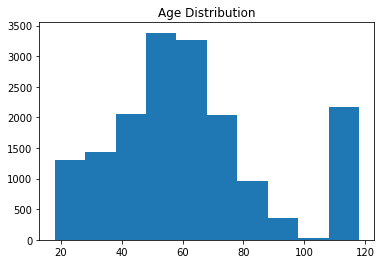

In [97]:
plt.hist(profile.age);
plt.title('Age Distribution');

In [98]:
#Creates a group age ranges
# reference: https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
profile['age group'] = pd.cut(profile.age, [18, 35, 45, 55, 65,150],
                              labels = ['18 - 34', '35 - 44', '45 - 54', '55 - 64', '65+'] ,include_lowest = True)

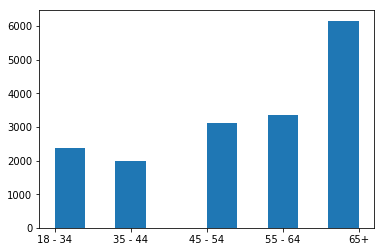

In [99]:
plt.hist(profile['age group']);

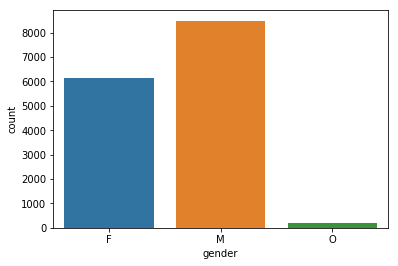

In [100]:
import seaborn as sns
sns.countplot(profile.gender);

### 3. transcript

In [101]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [102]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [103]:
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [104]:
#rename profile's id column to match the transcription dataset
profile.rename(columns = {'id': 'person'}, inplace = True)
profile.head(2)

,age,became_member_on,gender,person,income,start_year,age group
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,65404.991568,2017,65+
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.000000,2017,45 - 54


In [105]:
#rename portfolio's id column to match the transcription dataset
portfolio.rename(columns = {'id': 'offer_id'}, inplace = True)
portfolio.head(2)

,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1


In [106]:
transcript["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [107]:
# function to saperate the ids and take them only from the value column in transcript dataframe

def offerId_column(values):
    values1=list(values.keys())[0]
    if  values1 in ['offer id' or 'offer_id']:
        ids= list(values.values())[0]
        return ids
        
        
transcript['offer_id'] = transcript.value.apply(offerId_column)

In [108]:
transcript['offer_id'].unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837', None], dtype=object)

In [109]:
#i will drop the value column since we won't need it anymore
transcript = transcript.drop('value', axis=1)
transcript.head()

,event,person,time,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [110]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# 1- label encode : offer_id (10 ids) from portfolio dataset
le.fit(portfolio.offer_id)
off_id=portfolio['offer_id'].astype(str)
portfolio['offer_id'] = le.fit_transform(off_id)


In [144]:
# 2- label encode : offer_id (10 ids) from transcript dataset
le1 = preprocessing.LabelEncoder()
le1.fit(portfolio.offer_id)
transcript['offer_id'] = le1.fit_transform(transcript['offer_id'].astype(str))


In [112]:
# start merging the transcript dataset and profile dataset for further analysis and moduling
transcript = transcript.merge(profile, on=['person'])
transcript.head(3)

,event,person,time,offer_id,age,became_member_on,gender,income,start_year,age group
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,6,75,2017-05-09,F,100000.0,2017,65+
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,6,75,2017-05-09,F,100000.0,2017,65+
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,7,75,2017-05-09,F,100000.0,2017,65+


In [113]:
# start merging the transcript dataset and portfolio dataset for further analysis and moduling
transcript = transcript.merge(portfolio, on=['offer_id'], how='left')

In [114]:
len(transcript)

306534

In [115]:
transcript.head(5)

,event,person,time,offer_id,age,became_member_on,gender,income,start_year,age group,difficulty,duration,offer_type,reward,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,6,75,2017-05-09,F,100000.0,2017,65+,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,6,75,2017-05-09,F,100000.0,2017,65+,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,7,75,2017-05-09,F,100000.0,2017,65+,10.0,7.0,bogo,10.0,1.0,1.0,1.0,0.0
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,7,75,2017-05-09,F,100000.0,2017,65+,10.0,7.0,bogo,10.0,1.0,1.0,1.0,0.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,7,75,2017-05-09,F,100000.0,2017,65+,10.0,7.0,bogo,10.0,1.0,1.0,1.0,0.0


In [116]:
#label encoding - offer_type (4 different IDs) for moduling 

transcript['offer_type'] = le1.fit_transform(transcript['offer_type'].astype(str))
transcript['offer_type'].unique()

array([0, 2, 1, 3])

In [117]:
#label encoding - age_range (5 different IDs) for moduling 

transcript['age group'] = le1.fit_transform(transcript['age group'].astype(str))
transcript['age group'].unique()

array([4, 3, 1, 0, 2])

## Data Analysis

#### 1. what is the percentages of all age ranges?

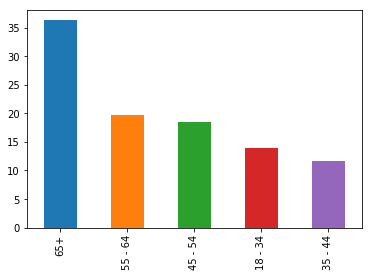

In [139]:
(profile['age group'].value_counts()/len(profile['age group'])*100).plot.bar()

So we can see that the result we got tell us that most customers  are older, which is not expected -for me at least-

#### 2.	How is the subscription date increasing over the years?

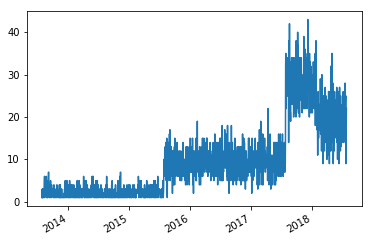

In [119]:
profile['became_member_on'].value_counts().plot()

Customers typically increased over time, as shown in the graph above, though there was a huge rise near the end of 2017. This could be attributed to a variety of factors, including a strong economy, great advertisements during that season that raised brand awareness, and so on. It decreases in 2018, yet it remains greater than in previous years prior to the rise.



#### 3.	what is the percentages of each gender?

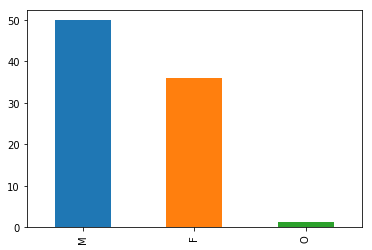

In [140]:
# calculates the percentages of all income ranges
( profile['gender'].value_counts()/len(profile['gender'])*100).plot.bar()

We can see that the female customers percentage is greater than the males in this dataset

#### 4. correlation heat map for profile dataset

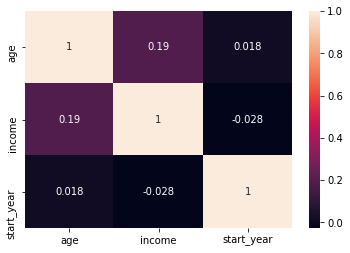

In [121]:
sns.heatmap(profile.corr(), annot = True); 

this heatmap shows us that there is a Positive relationship between the income and the age of the customer, which is natural 

#### 5. how does the age ranges effect the income of the starbucks customers?


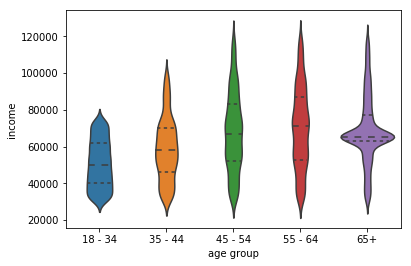

In [122]:
sns.violinplot(data = profile, x = 'age group', y = 'income', inner = 'quartile');

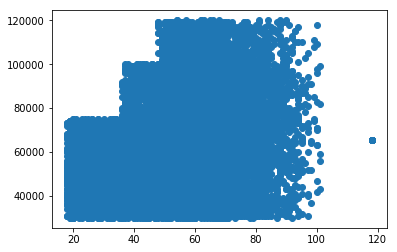

In [123]:
plt.scatter(data = profile, x = 'age', y = 'income');

#### 6. age distribution and gender in starbucks customers


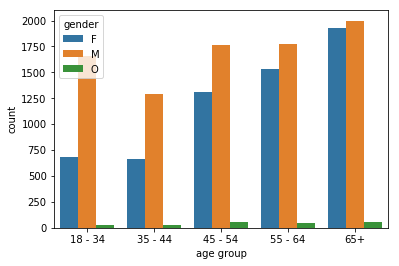

In [124]:
sns.countplot(data = profile, x = 'age group', hue = 'gender');

There are some interesting points in this result, we can notice that the female customers in this dataset were 50+ years old, maybe it has something to do with the fact that women normally live longer than men, or just the bias of the dataset.

#### 7.	what is the average age of starbucks customers?


In [125]:
profile['age'].describe()['mean']

62.531411764705879

We can see that most of the customers in this dataset are older and the average age is 62, so we most take that on consideration when we make decisions.

#### 8.	what is the average income of starbucks customers?


In [126]:
profile['income'].describe()['mean']
#maybe consider using the median if the result isn't accurate

65404.991568296799

since most of the customers are 50+ years old, it makes since that their incomes are high

#### 9.	what is the number of users for each year?

In [142]:
profile["start_year"].value_counts()

2017    6469
2018    4198
2016    3526
2015    1830
2014     691
2013     286
Name: start_year, dtype: int64

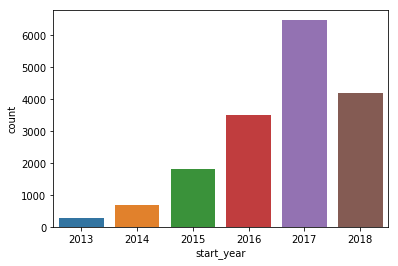

In [143]:
sns.countplot(profile["start_year"]);

This plot shows that there are a lot of customers join in 2017, maybe we can study the marketing techniques and the reasons why it happened, so we can gain more customers.

#### 10. what is the most frequent offer type?

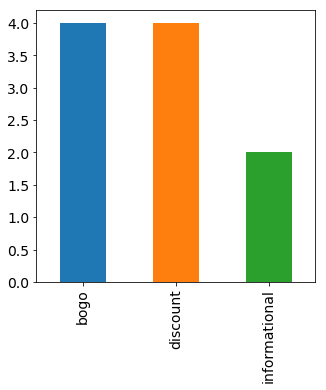

In [129]:
#offer_type + frequince
portfolio["offer_type"].value_counts().plot.bar(figsize=(5,5),fontsize=14,)

From this plot, we can see that the most popular type of offers are Buy One Get One (BOGO) offers and Discount offers.

#### 11. what is the most popular Offer Event to each Gender?

Text(0.5,1,'Most Popular Offer Event to Each Gender')

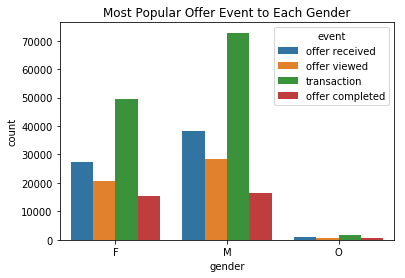

In [130]:
sns.countplot(x=transcript[transcript["gender"] != 'NA']['gender'],
              hue="event", data=transcript).set_title('Most Popular Offer Event to Each Gender')

here we can see that  Females tend to complete offers more than males with 56% completion of the offers they received, Where Males completed only 43.18% from the offers they received.

## Modeling

the model will predict the customers event for the offer and whether they will receive it, view it, make a transaction or complete it

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import Pipeline

Now, we will choose features and target from the dataframe
the features are:

- Time.
- Offer_id.
- age_range.
- Income.
- offer_type

In [132]:
features=transcript[['time', 'offer_id', 'income', 'age group',"offer_type"]]

#the target is Offer Event.  which is 'offer received', 'offer viewed', 'transaction', 'offer completed'
target=transcript[['event']].values

#Creating training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

# use StandardScaler() to Standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

### Metrics:
since we have a basic classification problem, I'll evaluate the models based on accuracy and classification report. We want to compare the number of correct predictions to the total number of forecasts to assess how well our model works.


Here are some of the best outcomes I got:

In [133]:
# 1. LogisticRegression

LG= LogisticRegression()
LG.fit(x1_train, y1_train)
print('Training set score: ', LG.score(x1_train, y1_train))
print('Test set score: ' ,LG.score(x1_test, y1_test))
y_pred = LG.predict(x1_test)
print(classification_report(y1_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score:  0.651298159601
Test set score:  0.650623633932
                 precision    recall  f1-score   support

offer completed       0.00      0.00      0.00     10073
 offer received       0.58      0.69      0.63     22828
   offer viewed       0.50      0.13      0.21     17338
    transaction       0.70      1.00      0.82     41722

    avg / total       0.55      0.65      0.57     91961



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
#2. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
print('Training set score: ', knn.score(x1_train, y1_train))
print('Test set score: ' ,knn.score(x1_test, y1_test))
y_pred = knn.predict(x1_test)
print(classification_report(y1_test, y_pred))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Training set score:  0.817507328508
Test set score:  0.761061754439
                 precision    recall  f1-score   support

offer completed       0.21      0.08      0.11     10073
 offer received       0.72      0.94      0.82     22828
   offer viewed       0.87      0.52      0.65     17338
    transaction       0.81      0.93      0.86     41722

    avg / total       0.73      0.76      0.73     91961



In [135]:
#3. Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x1_train, y1_train)
print('Training set score: ', dt.score(x1_train, y1_train))
print('Test set score: ' ,dt.score(x1_test, y1_test))
y_pred = dt.predict(x1_test)
print(classification_report(y1_test, y_pred))

Training set score:  0.861529642592
Test set score:  0.770424419047
                 precision    recall  f1-score   support

offer completed       0.15      0.13      0.14     10073
 offer received       0.85      0.97      0.90     22828
   offer viewed       0.95      0.78      0.85     17338
    transaction       0.80      0.81      0.81     41722

    avg / total       0.77      0.77      0.77     91961



In [136]:
#4. Naive Bayes

from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x1_train, y1_train)
print('Training set score: ', gnb.score(x1_train, y1_train))
print('Test set score: ' ,gnb.score(x1_test, y1_test))
y_pred = gnb.predict(x1_test)
print(classification_report(y1_test, y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score:  0.701085411492
Test set score:  0.700981937995
                 precision    recall  f1-score   support

offer completed       0.34      0.01      0.03     10073
 offer received       0.58      0.88      0.70     22828
   offer viewed       0.50      0.16      0.25     17338
    transaction       0.81      0.99      0.89     41722

    avg / total       0.64      0.70      0.63     91961



## Conclusion

In this project, I tried to analyze and make model to predict the customers event for the offer and whether they will receive it, view it, make a transaction or complete it. 

First I explored the data and see what I have to change before start the analysis. 

Then I did some exploratory analysis on the data after cleaning.

 From that analysis I found out that most favorite type of offers are Buy One Get One (BOGO) offers and Discount offers.

 I digged deep to see who and what type of customers we have and noticed that Females tend to complete offers more than males with 56% completion of the offers they received, Where Males completed only 43.18% from the offers they received.

also, i notice that most customers in this dataset are are older, which is was not expected.

in addition, there was a huge rise near the end of 2017. This could be attributed to a variety of factors, including a strong economy, great advertisements during that season that raised brand awareness, and so on. 

at the end, starbucks should give more offers to Females than Males since they have more completed offers. And they should focus more on BOGO and Discount offers since they are the one that tend to make customers buy more.

## improvement

we actually had good results, and we understand the data we have very well. 
But, in order to improve our outcomes, I'd like to improve my data collecting and resolve the data issues like having NaN values. I'll also try to obtain further information, such as the place and time the transaction was made, as well as the branch and time of day. All of this information can assist us in determining when and where we should make our proposals. Having more data is also a fantastic idea for improving our model outcomes.